In [1]:
%cd ../../bin/fuzzer

/go/src/github.com/QUIC-Tracker/quic-tracker/bin/fuzzer


In [2]:
import subprocess
import matplotlib.pyplot as plt

In [3]:
itr_diffs = []
for itr in range(10, 101, 10):
    cmd = ["go", "run", "modular_differential_fuzzer.go", "-hosts", "hosts.txt", "-max-instances", "8", "-iterations", str(itr), "-parallel", "true", "-generator", "stream_reassembly", "-debug=true", "-fuzz", "1"]
    print(cmd)
    p = subprocess.Popen(cmd, stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)
    p.wait()
    
    with open(r"comparison_results.txt", 'r') as fp:
        lines = len(fp.readlines())
        itr_diffs.append((itr, lines))

['go', 'run', 'modular_differential_fuzzer.go', '-hosts', 'hosts.txt', '-max-instances', '8', '-iterations', '10', '-parallel', 'true', '-generator', 'stream_reassembly', '-debug=true', '-fuzz', '1']
['go', 'run', 'modular_differential_fuzzer.go', '-hosts', 'hosts.txt', '-max-instances', '8', '-iterations', '20', '-parallel', 'true', '-generator', 'stream_reassembly', '-debug=true', '-fuzz', '1']
['go', 'run', 'modular_differential_fuzzer.go', '-hosts', 'hosts.txt', '-max-instances', '8', '-iterations', '30', '-parallel', 'true', '-generator', 'stream_reassembly', '-debug=true', '-fuzz', '1']
['go', 'run', 'modular_differential_fuzzer.go', '-hosts', 'hosts.txt', '-max-instances', '8', '-iterations', '40', '-parallel', 'true', '-generator', 'stream_reassembly', '-debug=true', '-fuzz', '1']
['go', 'run', 'modular_differential_fuzzer.go', '-hosts', 'hosts.txt', '-max-instances', '8', '-iterations', '50', '-parallel', 'true', '-generator', 'stream_reassembly', '-debug=true', '-fuzz', '1']


[(10, 26), (20, 48), (30, 77), (40, 101), (50, 121), (60, 159), (70, 210), (80, 239), (90, 182), (100, 53)]


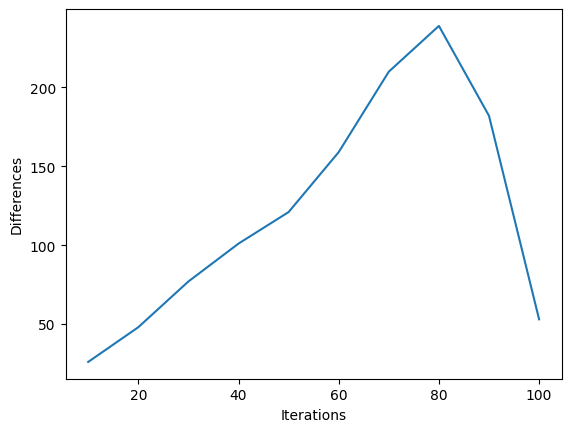

In [7]:
print(itr_diffs)
plt.plot([x[0] for x in itr_diffs], [x[1] for x in itr_diffs])
plt.xlabel("Iterations")
plt.ylabel("Differences")
plt.show()